## <h1> Housing Prices in California 1990</h1>
Darius Hammond, Madison Ellis, Eva Rubio DATA 3371 Final Project

To showcase machine learning algorithms learned this semester, we have included a dataset, from Kaggle, that includes information from the 1990 California census. The ultimate goal for our dataset is to provide housing price predicitions using linear regression, random forest, regression tree models, scikit preprocessing, and support vector machines. 

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.head(50) #to show the columns and rows of our data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
df.shape #showing how big the dataset is

(20640, 10)

In [5]:
df.dtypes #showing all datatypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Taken from Kaggle about our dataset: 

Longitude: A measure of how far west a house is; a higher value is farther west

Latitiude: A measure of how far north a hosue is; a higher value is farther north

Housing Median Age: Median age of a house within a block; a lower number is a newer building

Total Rooms: Total number of rooms within a block

Total Bedrooms: Total number of bedrooms within a block

Population: Total number of people residing within a block

Households: Total number of households, a group of people residing within a home unit, for a block

Median Income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

Median House Value: Median house value for households within a block (measured in US Dollars)

Ocean Proximity: Location of the house with respect to ocean/sea

STEP 1: Clean up the data. Do we need to keep the data with missing values? Dependent on where we go with the information, we could impute the missing data and fill in the blanks. First we need to see where missing data is and how it relates back to our housing prices. 

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

So the only missing data is in the total number of bedrooms. Bedroom numbers can greatly affect the price of a house, so we may want to eliminate these values to keep from skewing our outcomes. 

In [7]:
df[df.isnull().any(axis=1)] #to eliminate any null values for imputation 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [8]:
df=df.dropna() #dropping the missing values

In [9]:
df #new dataset without missing values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


STEP 2: build histograms to get a visualization of the consistencies in our data. 

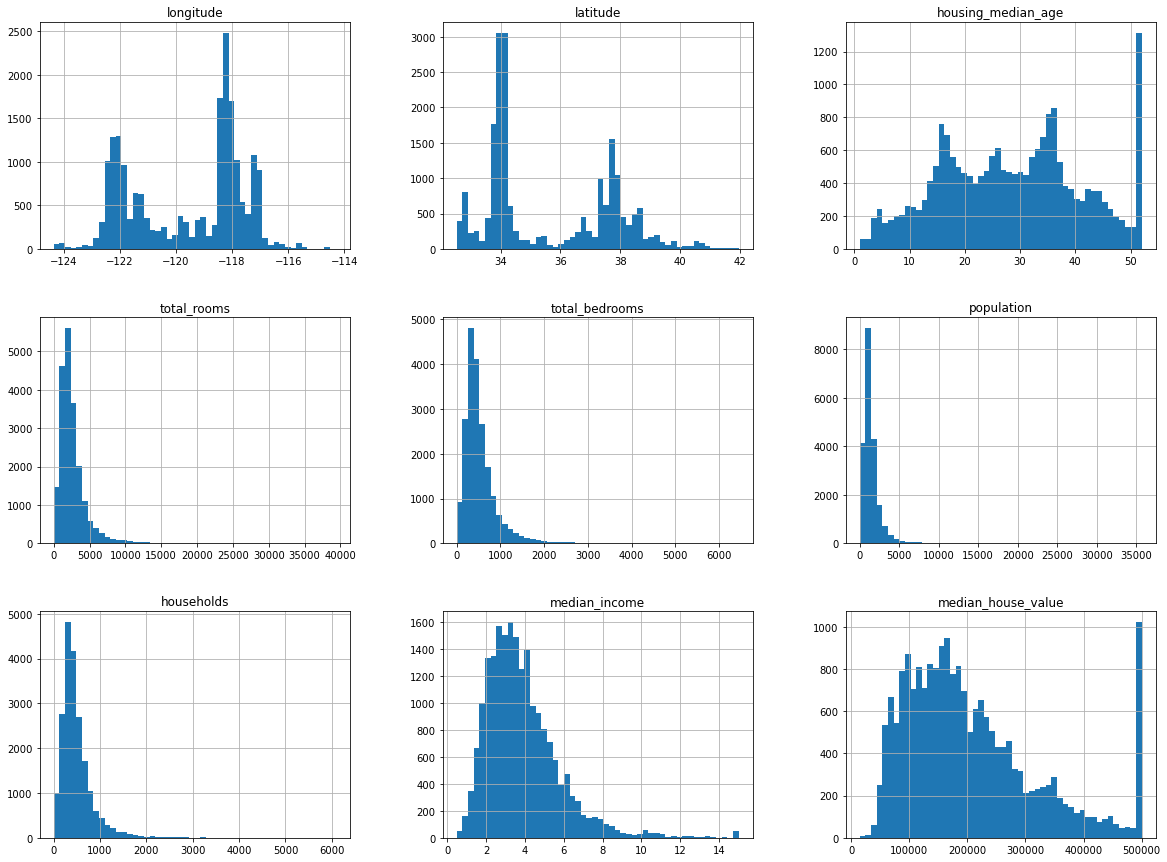

In [10]:
import matplotlib.pyplot as plt
df.hist(bins = 50, figsize = (20,15))
plt.show()

Longitude: our histogram is showing that there are more houses located in the -118 longitudinal area, which would be Inland.  

Latitude: our histogram is showing that there are more houses located in the 34 range, which would be more southern than northern (can't find if the dataset is talking about the entirety of California, so I'm not sure of the scale for "how" southern).

Housing Median Age: We have strong clusters between the age of 10-20 and 30-40 (meaning families are living in the area). We do have an outlier at the age of 50, so we will investigate that jump later on. 

Total Rooms: The blocks with around 2300 total rooms is considered the most popular in this dataset, totaling around 5900 observations. 

Total Bedrooms: The blocks with around 300 total bedrooms is considered the most popular in this dataset, totaling around 4800 observations.

Population: The blocks with around 2000 people are considered the most popular in this data set, totaling around 8600 observations.

Households: The households with around 300 people per block are the most popular, for around 4800 observations. 

Median Income: The most common median income per household ranges from 20-40k for around 1500 people. 

Median House Value: The median house value is around 150k for 950 people. We do have an outlier at 500k for 1000 people, so we will look into that later on. 


In order to investigate our outliers, I want to get a closer look of where they are in a boxplot.

In [11]:
df2= df['housing_median_age']

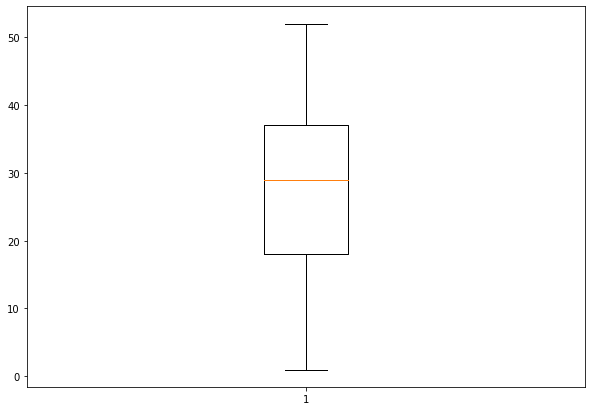

In [12]:
fig = plt.figure(figsize =(10, 7)) 
boxplot1= plt.boxplot(df2) 

Although our histogram for housing median age appeared to have outliers, our boxplot says we don't. We will double check this below.

In [13]:
df3=df['median_house_value']

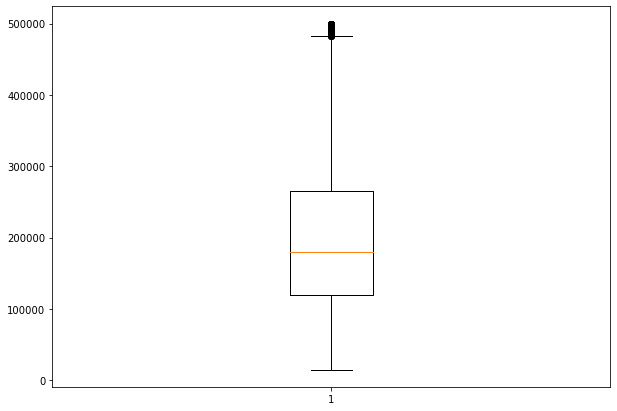

In [14]:
fig = plt.figure(figsize =(10, 7)) 
boxplot2 = plt.boxplot(df3) 

We can see the outliers for median house value at the top of our plot. Next we will double check both outliers. 

In [15]:
outliers1= boxplot1["fliers"][0].get_data()[1];outliers1

array([], dtype=float64)

In [16]:
outliers2= boxplot2["fliers"][0].get_data()[1];outliers2

array([500001., 483300., 500001., ..., 500001., 500001., 500001.])

In [17]:
len(outliers1)

0

In [18]:
len(outliers2)

1064

So we definitely don't have any outliers in our first histogram check, but have 1064 in the median house value column. If we need to investigate these outliers further in our analysis, we can. 

STEP 3 : Look into ocean_proximity and try to change into numerical values

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric. This means the categorical data here must be converted to a numerical form. 

In [19]:
df_num = df.drop('ocean_proximity',axis=1)

In [20]:
df_categorical = df[["ocean_proximity"]]

This is called a label encoder or integer encoder.The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship.

In [21]:
df_categorical.value_counts()

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_categorical_encoded = ordinal_encoder.fit_transform(df_categorical)
print('The encoded data matrix is:\n\n {}\n'.format(df_categorical_encoded))

The encoded data matrix is:

 [[3.]
 [3.]
 [3.]
 ...
 [1.]
 [1.]
 [1.]]



In [22]:
df_categorical_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [23]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [24]:
encoding_reversed=ordinal_encoder.inverse_transform([[4],[3],[2],[1],[0]])
print('The encoding is reversed and we obtain:\n\n {}\n'.format(encoding_reversed))

The encoding is reversed and we obtain:

 [['NEAR OCEAN']
 ['NEAR BAY']
 ['ISLAND']
 ['INLAND']
 ['<1H OCEAN']]



Our encoder above shows 4 to 1 which represents the total 4 different ocean proximities. 4 is encoded as NEAR OCEAN, 3 is NEAR BAY, 2 is ISLAND, 1 is INLAND, and 0 is <1H OCEAN.

Now we start with One hot encoding which is used primarily for features that are nominal in nature. Which means there is no sense of ordering among the categories. The encoder lists categories in alphanumerical order in the encoding.

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing as pr
#defining the encoder
onehot_encoder=pr.OneHotEncoder()

#applying it to all feature columns that are ordinal. In this case the ocean proximity
onehot_encoder.fit(df_categorical)

onehotencoded_data=onehot_encoder.transform(df_categorical)
print('The encoded data matrix is:\n\n {}\n'.format(onehotencoded_data))
#

The encoded data matrix is:

   (0, 3)	1.0
  (1, 3)	1.0
  (2, 3)	1.0
  (3, 3)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 3)	1.0
  (7, 3)	1.0
  (8, 3)	1.0
  (9, 3)	1.0
  (10, 3)	1.0
  (11, 3)	1.0
  (12, 3)	1.0
  (13, 3)	1.0
  (14, 3)	1.0
  (15, 3)	1.0
  (16, 3)	1.0
  (17, 3)	1.0
  (18, 3)	1.0
  (19, 3)	1.0
  (20, 3)	1.0
  (21, 3)	1.0
  (22, 3)	1.0
  (23, 3)	1.0
  (24, 3)	1.0
  :	:
  (20408, 1)	1.0
  (20409, 1)	1.0
  (20410, 1)	1.0
  (20411, 1)	1.0
  (20412, 1)	1.0
  (20413, 1)	1.0
  (20414, 1)	1.0
  (20415, 1)	1.0
  (20416, 1)	1.0
  (20417, 1)	1.0
  (20418, 1)	1.0
  (20419, 1)	1.0
  (20420, 1)	1.0
  (20421, 1)	1.0
  (20422, 1)	1.0
  (20423, 1)	1.0
  (20424, 1)	1.0
  (20425, 1)	1.0
  (20426, 1)	1.0
  (20427, 1)	1.0
  (20428, 1)	1.0
  (20429, 1)	1.0
  (20430, 1)	1.0
  (20431, 1)	1.0
  (20432, 1)	1.0



In [26]:
print('The encoded data matrix is:\n\n {}\n'.format(onehotencoded_data.toarray()))

The encoded data matrix is:

 [[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]



Our One hot encoder displays the encoded values, for example our encoded array for NEAR BAY would be "[0. 0. 0. 1. 0.]" and for <1H OCEAN it is "0. 1. 0. 0. 0.]"

In [27]:
df['ocean_proximity']= df_categorical_encoded

STEP 4: We want to create a scatter plot showing population and median house value, then compute the correlation coefficient. "Population" relates to the total number of people residing within a block from the house. We think that there will be a positive correlation between the two considering if an area is more populated, the prices of housing usually goes up. 

Text(0, 0.5, 'Population')

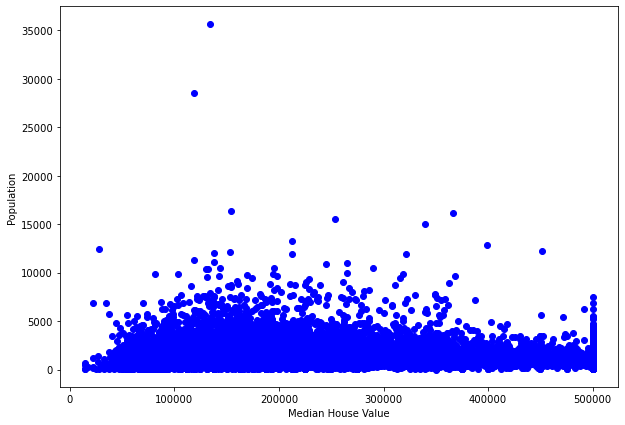

In [28]:
# Scatterplot
fig = plt.figure(figsize =(10, 7))
ax =plt.scatter(df['median_house_value'],df['population'], color='blue',)


#label x and y axes

plt.xlabel("Median House Value")
plt.ylabel("Population")

Because our data doesn't follow the pattern of being scattered from the bottom left to the top right corner, we can see that these two categories are not positively correlated. To take it a step further, we will find the correlation coefficient.

In [29]:
col_1 = df['median_house_value']
col_2 = df['population']
correlation= col_1.corr(col_2)
print(correlation)

-0.025299732287442003


The correlation above solidifies our visual prediction from the scatterplot. 

STEP 5: We want to create a heatmap to show the different correlations our data shares, and then further compare the relations. 

In [30]:
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:>

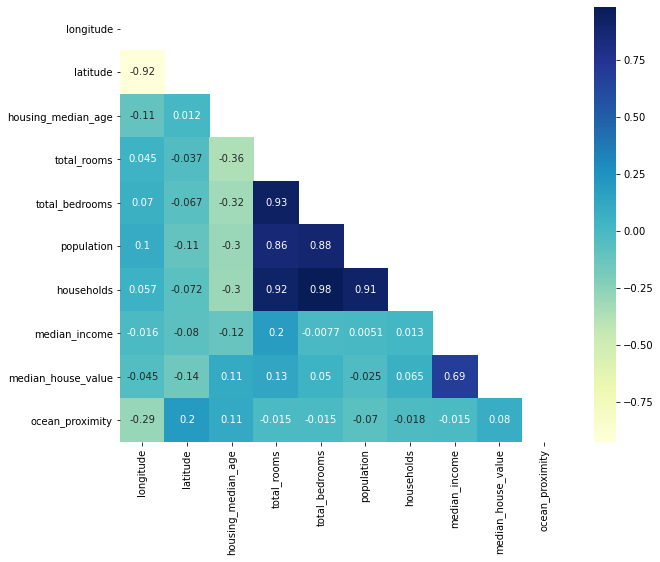

In [31]:
mask = np.triu(np.ones_like(df.corr())) 
fig, ax = plt.subplots(figsize=(10,8))
sb.heatmap(df.corr(), cmap="YlGnBu", annot=True,mask=mask)

The closer to 1 or -1 the value, the better the values of the variables predict one another. Median house value and the median income have a, relatively, strong correlation of 0.7. Next, we want to create a scatterplot with our correlating values. 

STEP 6: make a new dataframe with top correlated variables and do another scatter plot

Text(0, 0.5, 'Median Income')

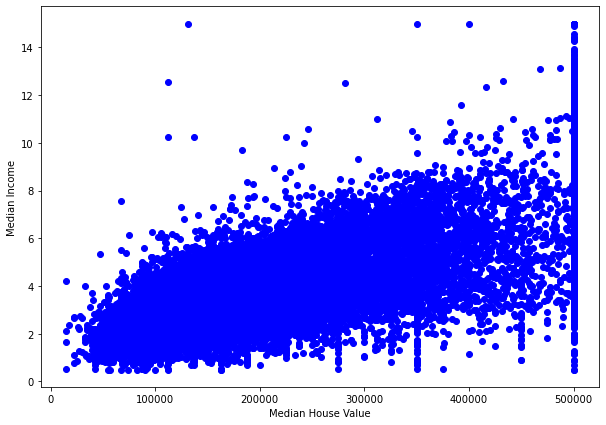

In [32]:
# Scatterplot
fig = plt.figure(figsize =(10, 7))
ax =plt.scatter(df['median_house_value'],df['median_income'], color='blue',)


#label x and y axes

plt.xlabel("Median House Value")
plt.ylabel("Median Income")

As predicted, they show a positive correlation. To double check ourselves we will compute the correlation coefficient for these two variables. 

In [33]:
col_1 = df['median_house_value']
col_2 = df['median_income']
correlation= col_1.corr(col_2)
print(correlation)

0.6883554753161124


It gives us the unrounded number that we obtained from the heatmap. 

STEP 7: Scikit Learn Preprocessing 
select and train a model 

In [34]:
from sklearn import preprocessing as pr

In [35]:
df_num = df.drop("ocean_proximity", axis=1)

In [36]:
#Standard Scaler:

scaler=pr.StandardScaler().fit(df)
print('The Means stored in the scaler are:\n\n {}\n'.format(scaler.mean_))
print('The standard deviations stored in the scaler are:\n\n {}\n'.format(scaler.scale_))

standardized_scaled_df=scaler.transform(df)
print('The standardized data is:\n\n{}'.format(standardized_scaled_df))

The Means stored in the scaler are:

 [-1.19570689e+02  3.56332213e+01  2.86330935e+01  2.63650423e+03
  5.37870553e+02  1.42494695e+03  4.99433465e+02  3.87116160e+00
  2.06864413e+05  1.16615279e+00]

The standard deviations stored in the scaler are:

 [2.00352886e+00 2.13629539e+00 1.25914971e+01 2.18521609e+03
 4.21374759e+02 1.13318076e+03 3.82289871e+02 1.89924477e+00
 1.15432842e+05 1.42010012e+00]

The standardized data is:

[[-1.32731375  1.05171726  0.98216331 ...  2.34516291  2.12881864
   1.29135065]
 [-1.32232256  1.04235526 -0.60621017 ...  2.33263161  1.31362603
   1.29135065]
 [-1.33230494  1.03767426  1.85576873 ...  1.78293943  1.25818254
   1.29135065]
 ...
 [-0.82320322  1.77727236 -0.92388486 ... -1.14317103 -0.99247676
  -0.11700076]
 [-0.87311515  1.77727236 -0.84446619 ... -1.05513604 -1.05831591
  -0.11700076]
 [-0.83318561  1.74918635 -1.00330353 ... -0.78060586 -1.01759959
  -0.11700076]]


The scaler will standardize the current dataset using the first dataset's means and standard deviations. This is true for both the training and testing sets.

We use a scaler integrated into the training set to standardize it, and when we get a testing set, we use the same scaler we used with the training set to standardize it.

In [37]:
new_df=np.array([[4,0,2,3,1,10,3,6,7,1],[4,1,7,7,0,10,3,2,5,1],[9,0,2,8,1,0,3,3,4,1]])
standardized_new_df=scaler.transform(new_df)
standardized_new_df

array([[ 61.67652033, -16.67991301,  -2.11516497,  -1.20514591,
         -1.27409282,  -1.2486507 ,  -1.29857865,   1.1208868 ,
         -1.79201524,  -0.11700076],
       [ 61.67652033, -16.21181295,  -1.7180716 ,  -1.20331543,
         -1.276466  ,  -1.2486507 ,  -1.29857865,  -0.98521351,
         -1.79203257,  -0.11700076],
       [ 64.17211702, -16.67991301,  -2.11516497,  -1.20285781,
         -1.27409282,  -1.25747542,  -1.29857865,  -0.45868843,
         -1.79204123,  -0.11700076]])

We have used the previous cell's scaler to standardize a new array.

In [38]:
min_max_scaler=pr.MinMaxScaler()
min_max_scaler.fit_transform(df)

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.53966842, 0.90226638,
        0.75      ],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.53802706, 0.70824656,
        0.75      ],
       [0.21015936, 0.5642933 , 1.        , ..., 0.46602805, 0.69505074,
        0.75      ],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.08276438, 0.15938285,
        0.25      ],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.09429525, 0.14371281,
        0.25      ],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.13025338, 0.15340349,
        0.25      ]])

We defined the minmax scaler in the absence of an attribute. The transform completes the definition of the scaler that we applied to the array.

In [39]:
print('The Minima stored in the scaler are:\n\n {}\n'.format(min_max_scaler.min_))
print('The Ranges stored in the scaler are:\n\n {}\n'.format(min_max_scaler.scale_))

The Minima stored in the scaler are:

 [ 1.23854582e+01 -3.45802338e+00 -1.96078431e-02 -5.08672872e-05
 -1.55183116e-04 -8.40830741e-05 -1.64446637e-04 -3.44753865e-02
 -3.09256457e-02  0.00000000e+00]

The Ranges stored in the scaler are:

 [9.96015936e-02 1.06269926e-01 1.96078431e-02 2.54336436e-05
 1.55183116e-04 2.80276914e-05 1.64446637e-04 6.89645660e-02
 2.06184717e-06 2.50000000e-01]



We applied the same scaler to a different data set and we will apply now the actual standard scaling.

In [40]:
minmax_ar_data=min_max_scaler.fit_transform(df)
print('The standardized data is:\n\n {}'.format(minmax_ar_data))
min_max_scaler.fit_transform(np.array([[2,0,-5],[1,100,-7]]))

The standardized data is:

 [[0.21115538 0.5674814  0.78431373 ... 0.53966842 0.90226638 0.75      ]
 [0.21215139 0.565356   0.39215686 ... 0.53802706 0.70824656 0.75      ]
 [0.21015936 0.5642933  1.         ... 0.46602805 0.69505074 0.75      ]
 ...
 [0.31175299 0.73219979 0.31372549 ... 0.08276438 0.15938285 0.25      ]
 [0.30179283 0.73219979 0.33333333 ... 0.09429525 0.14371281 0.25      ]
 [0.30976096 0.72582359 0.29411765 ... 0.13025338 0.15340349 0.25      ]]


array([[1., 0., 1.],
       [0., 1., 0.]])

In [41]:
min_max_scaler=pr.MinMaxScaler(feature_range=(10,20))
new_data=min_max_scaler.fit_transform(df)
new_data

array([[12.11155378, 15.67481403, 17.84313725, ..., 15.39668418,
        19.02266382, 17.5       ],
       [12.12151394, 15.65356004, 13.92156863, ..., 15.38027062,
        17.08246564, 17.5       ],
       [12.10159363, 15.64293305, 20.        , ..., 14.66028055,
        16.95050742, 17.5       ],
       ...,
       [13.11752988, 17.32199787, 13.1372549 , ..., 10.82764376,
        11.59382848, 12.5       ],
       [13.01792829, 17.32199787, 13.33333333, ..., 10.94295251,
        11.43712809, 12.5       ],
       [13.09760956, 17.25823592, 12.94117647, ..., 11.30253376,
        11.53403491, 12.5       ]])

We scaled to a [10,20] range and after we performed the minmax scaler with rescaling betwenn 10 and 20.

In [42]:
max_ab_scaler=pr.MaxAbsScaler()

max_ab_scaler.fit_transform(df)

array([[-0.98295135,  0.90297974,  0.78846154, ...,  0.55500963,
         0.90519819,  0.75      ],
       [-0.98287093,  0.90250298,  0.40384615, ...,  0.55342298,
         0.71699857,  0.75      ],
       [-0.98303177,  0.9022646 ,  1.        , ...,  0.48382344,
         0.70419859,  0.75      ],
       ...,
       [-0.97482911,  0.93992849,  0.32692308, ...,  0.11333258,
         0.18459963,  0.25      ],
       [-0.97563329,  0.93992849,  0.34615385, ...,  0.12447917,
         0.16939966,  0.25      ],
       [-0.97498995,  0.93849821,  0.30769231, ...,  0.15923894,
         0.17879964,  0.25      ]])

We have completed the definition of the scaler and applied it to the data.

In [43]:
#Robust Scaler:

from sklearn.preprocessing import RobustScaler
robust_scaler=RobustScaler().fit(df)

new_data=robust_scaler.transform(df)
new_data

array([[-0.98680739,  0.95514512,  0.63157895, ...,  2.19634913,
         1.87947658,  2.        ],
       [-0.98416887,  0.94986807, -0.42105263, ...,  2.1854332 ,
         1.23140496,  2.        ],
       [-0.98944591,  0.94722955,  1.21052632, ...,  1.70660001,
         1.18732782,  2.        ],
       ...,
       [-0.72031662,  1.36411609, -0.63157895, ..., -0.84231528,
        -0.60192837,  0.        ],
       [-0.74670185,  1.36411609, -0.57894737, ..., -0.76562858,
        -0.65426997,  0.        ],
       [-0.72559367,  1.34828496, -0.68421053, ..., -0.52648718,
        -0.62190083,  0.        ]])

Our dataset is best served by the Standard and Robust scalers. As we learned during the course, Robust is typically used when we have data with a large number of outliers, which we do in this scenario. The Standard scale is used to normalize each column and set each column's mean to 0 and variance to 1. We can create smoother predictions and transformations as a result of this.

STEP 8: Create a pipeline 

Making a pipeline allows you to chain your actions in that the output of one element in the chain is the input of the next one. We now apply this below.

In [44]:
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Normalizer

data_array=df

print('This is the original Data:\n\n{}\n'.format(df))
#newpipeline creation that standardizes and normalizes a dataset in sequence in that order
new_pipeline=Pipeline([("Std Transf",StandardScaler()),("Normal Transf",Normalizer())])
new_pipeline.fit_transform(df)


#Pipeline involving machine learning algorithms. The following will first standardize the data then apply a regression 
#to the standardized data.
new_pipeline=Pipeline([("Std Transf",StandardScaler()),("Normal Transf",Normalizer())])
df_num_tr = new_pipeline.fit_transform(df)
print('This is the pipelined Data:\n\n{}\n'.format(new_pipeline.fit_transform(df)))

This is the original Data:

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  hous

Now that we have the new data, lets begin to build back a new dataframe which list the correct columns etc. We will also add columns for the ocean proximity data that was encoded to 0s and 1s.

In [45]:
ndf_col = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value',"ocean_proximity"]

In [46]:
new_data = pd.DataFrame(data = df_num_tr, columns=ndf_col)
new_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-0.304339,0.241148,0.225200,-0.184306,-0.222485,-0.223172,-0.223977,0.537721,0.488115,0.296093
1,-0.284802,0.224502,-0.130565,0.439833,0.290391,0.185515,0.359764,0.502402,0.282928,0.278131
2,-0.343125,0.267245,0.477940,-0.137834,-0.212617,-0.211126,-0.217218,0.459183,0.324036,0.332578
3,-0.382363,0.296694,0.530606,-0.178275,-0.205512,-0.218747,-0.209742,0.266757,0.332991,0.369226
4,-0.404856,0.314148,0.561820,-0.139858,-0.185271,-0.229745,-0.190404,-0.003979,0.354941,0.390947
...,...,...,...,...,...,...,...,...,...,...
20428,-0.277893,0.659876,-0.105737,-0.162921,-0.142514,-0.187549,-0.162417,-0.445881,-0.408783,-0.042876
20429,-0.259525,0.572635,-0.267853,-0.281521,-0.291966,-0.299207,-0.319794,-0.219507,-0.356566,-0.037111
20430,-0.306618,0.661979,-0.344119,-0.065198,-0.046734,-0.137376,-0.064727,-0.425796,-0.369667,-0.043579
20431,-0.316294,0.643833,-0.305915,-0.128727,-0.110791,-0.218646,-0.142551,-0.382232,-0.383384,-0.042385


STEP 9: Linear Regression

Now we start to make predictions and we will start with Linear Regression. Linear Regression is one common machine learning tool in data science. It makes predictions by discovering the best fit line that reaches most points. When the model learns it can predict a variety of things. In this case we will use Linear Regression to predict housing prices.

First we set up our list of features and our target variable. These are the values that will be trained and tested.

In [47]:
X=df_num_tr
Y=df["median_house_value"]

Lets setup our train test split data. We need the training set to teach our model about the true values and then we'll use what it learned to predict our prices.

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_num_tr, df["median_house_value"], test_size = 0.33, random_state = 10)

In [49]:
print(X_train.shape) # 13690 rows and 14 columns
print(X_test.shape) #6743 rows and 14 columns
print(y_train.shape)
print(y_test.shape) 

(13690, 10)
(6743, 10)
(13690,)
(6743,)


We now setup the Linear Regression object, fit the training data and then predict.

In [50]:
from sklearn.linear_model import LinearRegression
# Create LinearRegression Instance
reg = LinearRegression()

# Fit data on to the model
reg.fit(X_train, y_train)

# Predict
y_predicted = reg.predict(X_test)
y_predicted

array([413182.43993985, 304784.91484619, 480930.85119107, ...,
       119801.42352637, 173193.24774941, 168238.9594398 ])

In [51]:
df["median_house_value"]

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

Lets evaluate how well our model did using R^2 and root mean squared error. The R^2 value shows how strong our features determined the target value. The rmse shows the difference between predicted and the test values. The higher the rmse value the less accurate the model is.

In [52]:
from sklearn.metrics import mean_squared_error
def linear_metrics():
    r2 = reg.score(X_test, y_test)
    rmse = (np.sqrt(mean_squared_error(y_test, y_predicted)))
    print('r-squared: {}'.format(r2))
    print('---------------------------------------')
    print('root mean squared error: {}'.format(rmse))
linear_metrics()

r-squared: 0.9110027141099666
---------------------------------------
root mean squared error: 34323.92139152071


With a .91, the model is really good which shows a good correlation.

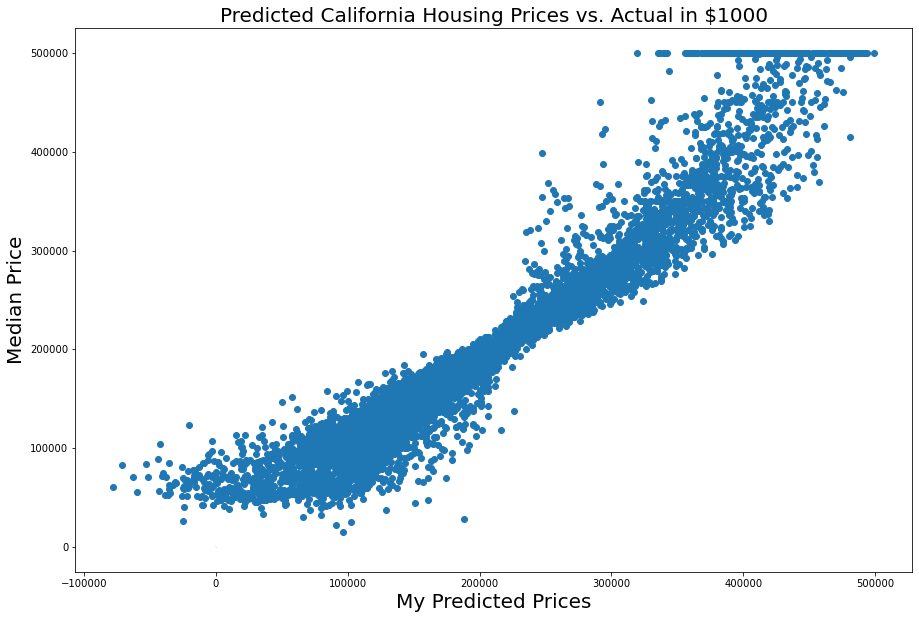

In [53]:
# Plot my predictions vs actual

plt.figure(figsize=(15,10))
plt.scatter(y_predicted, y_test)
plt.plot([0, 75], [0, 75], '--k')
plt.axis('tight')
plt.ylabel('Median Price', fontsize=20);


plt.xlabel('My Predicted Prices', fontsize=20);
plt.title("Predicted California Housing Prices vs. Actual in $1000", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

STEP 10: Create a Decision Tree

In [54]:
#Split the data into training set and testing set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.median_income, df.median_house_value, test_size = 0.3, random_state=42,shuffle=False)

To check and validate our data, I have set a random_state number. I chose 42 because I repeatedly saw it used in many official examples using scikit. The random_state ensures that our data is reproduced the same way each time it is run. 

Now that we have a train and test data set, we can implement the decision tree classification and plot the tree figure.

In [55]:
from sklearn import tree
from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [56]:
x_train= x_train.values.reshape(-1,1)
y_train= y_train.values.reshape(-1,1)
x_test= x_test.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

Did linear regression so we could easily reshape the training sets

The accuracy of the classifier (The amount, in percentage of the y variable explained by the x variable) with the Testing Data is:
0.4255654732423182
The features explain 42.5% of the Target, which is a pretty good R-Square value!

The cross validated accuracy(on each of the 10 bootstrap samples) of the classifier with the Training Data is:
[0.55095034 0.33390143 0.44442885 0.26522459 0.52405951 0.45135404
 0.42441475 0.37653617 0.1880102  0.01178786]



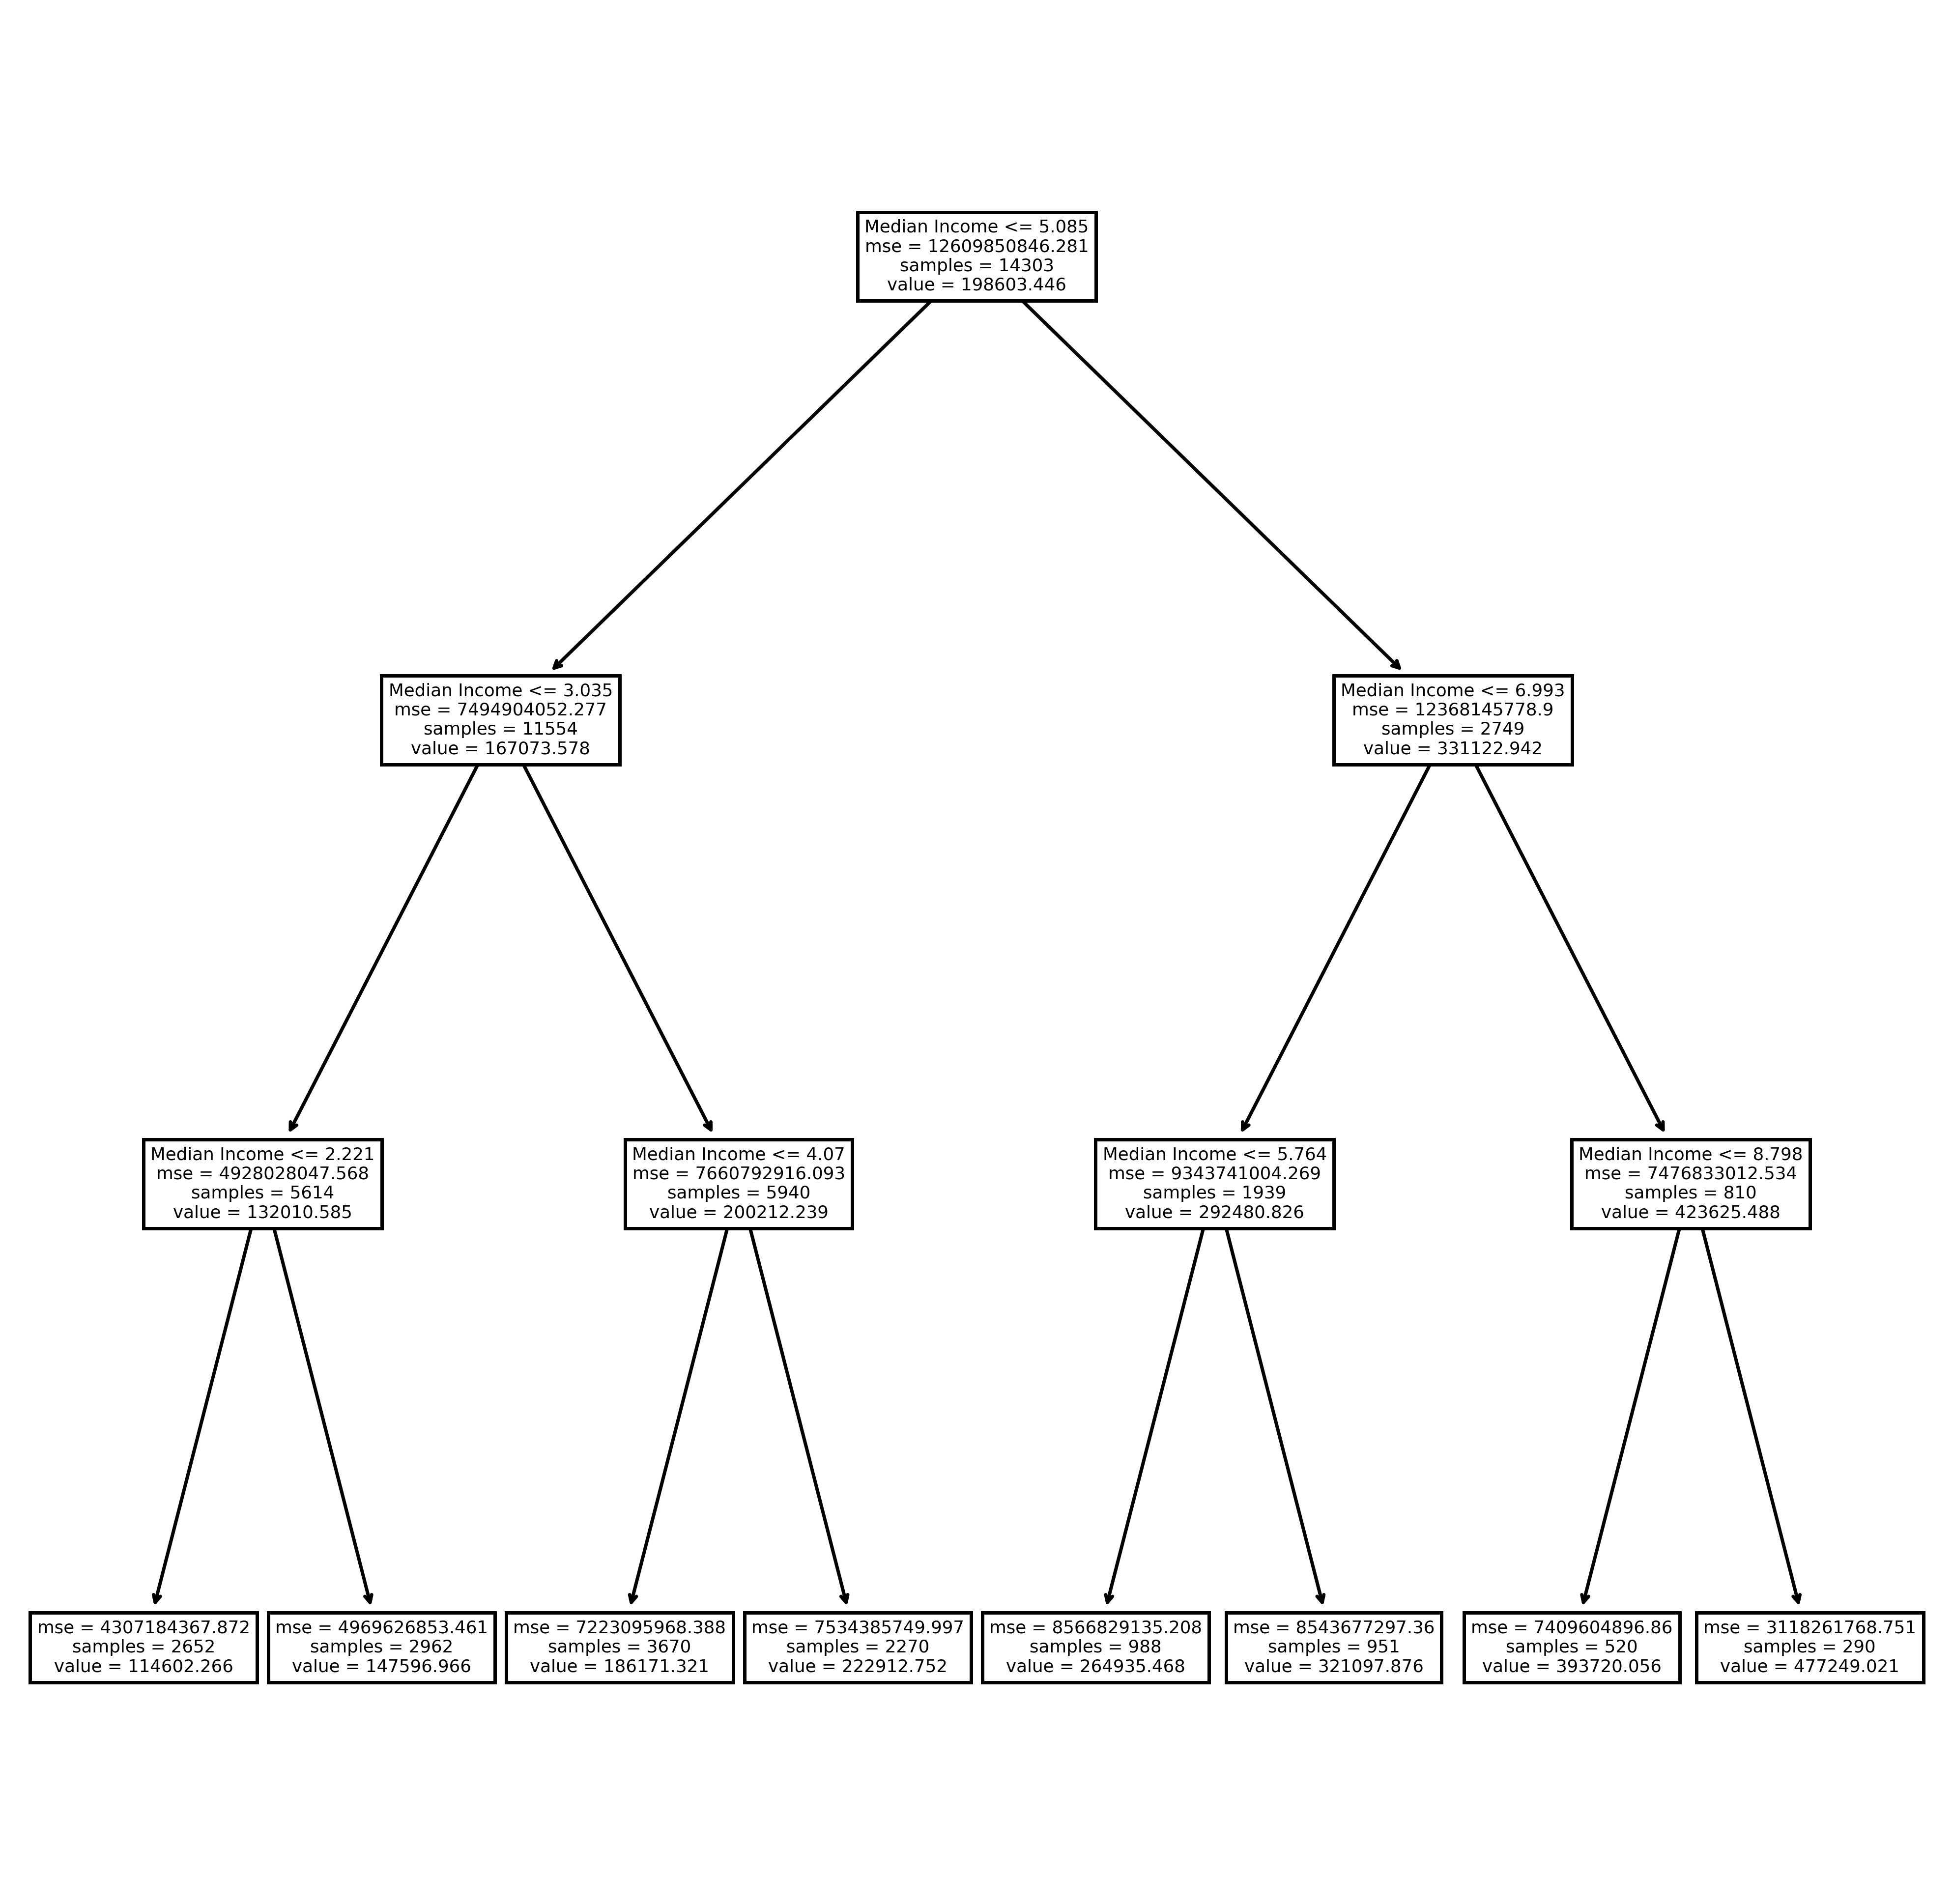

In [57]:
#Decision tree code
Reg_tree_classifier=tree.DecisionTreeRegressor(max_depth=3)
classifier=Reg_tree_classifier.fit(x_train,y_train)
print('The accuracy of the classifier (The amount, in percentage of the y variable explained by the x variable) with the Testing Data is:\n{}'.format(classifier.score(x_test,y_test)))
print('The features explain 42.5% of the Target, which is a pretty good R-Square value!\n')
print('The cross validated accuracy(on each of the 10 bootstrap samples) of the classifier with the Training Data is:\n{}\n'.format(cross_val_score(Reg_tree_classifier,x_train,y_train,cv=10)))
#Plotting the decision tree
fg,ax=plt.subplots(figsize=(10,10),dpi=500)
tree.plot_tree(Reg_tree_classifier,feature_names=['Median Income','Median House Value'])
plt.show()

Our MSE is extremely high. We want this number to get closer and closer to 0 as it goes down our tree. I'm going to investigate what is going on and hopefully find a solution. To start, I'm going to manually calculate our Root Mean Squared Error. 

In [58]:
reg.fit(np.array(x_train).reshape(-1,1), y_train)

LinearRegression()

In [59]:
pred=reg.predict(x_test)

In [60]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,pred))
er = []
g = 0
for i in range(len(y_test)):
    print( "actual=", y_test[i], " observed=", pred[i])
    x = (y_test[i] - pred[i]) **2
    er.append(x)
    g = g + x
    
x = 0
for i in range(len(er)):
   x = x + er[i]

print ("MSE", x / len(er))

Mean squared error: 8325649954.58
actual= [307400.]  observed= [182391.82887584]
actual= [275000.]  observed= [216886.28591551]
actual= [295500.]  observed= [179633.59362297]
actual= [227800.]  observed= [159595.09709274]
actual= [290600.]  observed= [138383.93767058]
actual= [326500.]  observed= [162811.6618562]
actual= [500001.]  observed= [329433.01987889]
actual= [450000.]  observed= [196835.40210121]
actual= [332400.]  observed= [265638.50691949]
actual= [394400.]  observed= [314270.98417748]
actual= [311900.]  observed= [204048.93052452]
actual= [376000.]  observed= [174823.1983092]
actual= [360300.]  observed= [163249.34589333]
actual= [410000.]  observed= [202244.51614502]
actual= [500000.]  observed= [196282.10341276]
actual= [500001.]  observed= [213504.55736445]
actual= [500001.]  observed= [214809.35128647]
actual= [405200.]  observed= [228394.07281634]
actual= [500001.]  observed= [509135.34987928]
actual= [488900.]  observed= [137983.41548566]
actual= [381300.]  observed=

actual= [132500.]  observed= [142219.86663752]
actual= [153100.]  observed= [129692.19334828]
actual= [144500.]  observed= [152588.02340394]
actual= [147800.]  observed= [182243.181467]
actual= [478500.]  observed= [405565.2677718]
actual= [67500.]  observed= [188234.49786209]
actual= [187500.]  observed= [346428.37362264]
actual= [500001.]  observed= [176437.67433296]
actual= [500001.]  observed= [252863.08794885]
actual= [320800.]  observed= [174872.74744548]
actual= [452800.]  observed= [227130.56984122]
actual= [500001.]  observed= [261814.96523662]
actual= [432400.]  observed= [253854.07067444]
actual= [334600.]  observed= [239988.57070566]
actual= [422200.]  observed= [228831.75685347]
actual= [409700.]  observed= [209420.88271611]
actual= [368800.]  observed= [194023.48861737]
actual= [404500.]  observed= [254419.75664696]
actual= [482700.]  observed= [304902.06832603]
actual= [125000.]  observed= [121136.70915075]
actual= [93000.]  observed= [108695.74684999]
actual= [92500.]  

actual= [338700.]  observed= [296218.58219311]
actual= [245800.]  observed= [207893.11768084]
actual= [367100.]  observed= [174249.2541473]
actual= [122400.]  observed= [162328.55777748]
actual= [343200.]  observed= [207405.88450743]
actual= [357100.]  observed= [220544.66381078]
actual= [369400.]  observed= [178436.15616289]
actual= [284800.]  observed= [189175.93145139]
actual= [276300.]  observed= [174125.3813066]
actual= [290000.]  observed= [208520.74007371]
actual= [331300.]  observed= [175644.8881525]
actual= [281300.]  observed= [210671.99840716]
actual= [243700.]  observed= [230916.94967188]
actual= [245500.]  observed= [209821.40490104]
actual= [262100.]  observed= [268945.91176613]
actual= [354000.]  observed= [156688.21443103]
actual= [500001.]  observed= [188168.43234705]
actual= [183000.]  observed= [204123.25422894]
actual= [188100.]  observed= [212699.38389992]
actual= [168800.]  observed= [240277.60733395]
actual= [259800.]  observed= [256281.97835212]
actual= [267900.

actual= [475000.]  observed= [148446.54142994]
actual= [364300.]  observed= [125488.77495393]
actual= [350000.]  observed= [181305.87697239]
actual= [500001.]  observed= [178783.00011684]
actual= [500001.]  observed= [169855.89739722]
actual= [500001.]  observed= [191657.51736004]
actual= [500000.]  observed= [213256.81168306]
actual= [500000.]  observed= [167803.73733632]
actual= [492900.]  observed= [180566.76902289]
actual= [335700.]  observed= [181400.84615026]
actual= [400000.]  observed= [225780.35587761]
actual= [488900.]  observed= [175359.98061889]
actual= [438900.]  observed= [169277.82414063]
actual= [250000.]  observed= [146237.47577083]
actual= [450000.]  observed= [161118.73303333]
actual= [366700.]  observed= [153372.55139502]
actual= [412500.]  observed= [141245.4002907]
actual= [337500.]  observed= [140873.78176861]
actual= [222700.]  observed= [178423.76887882]
actual= [354500.]  observed= [156151.43212134]
actual= [418800.]  observed= [194580.91640051]
actual= [47690

actual= [107600.]  observed= [175446.69160738]
actual= [92600.]  observed= [180426.37980344]
actual= [66000.]  observed= [110372.1592941]
actual= [61300.]  observed= [101081.69624176]
actual= [59000.]  observed= [113312.07471333]
actual= [54600.]  observed= [117643.49504307]
actual= [52000.]  observed= [114030.53718938]
actual= [56800.]  observed= [102890.23971595]
actual= [52700.]  observed= [112597.74133198]
actual= [42500.]  observed= [70980.59595218]
actual= [63800.]  observed= [126075.1063999]
actual= [43000.]  observed= [94371.91737063]
actual= [45000.]  observed= [122887.44529928]
actual= [60800.]  observed= [97642.16036505]
actual= [67500.]  observed= [140308.09579609]
actual= [55000.]  observed= [150630.83252091]
actual= [118400.]  observed= [191277.64064857]
actual= [87200.]  observed= [173733.11731106]
actual= [88100.]  observed= [126467.37039545]
actual= [80300.]  observed= [147484.46236718]
actual= [59400.]  observed= [130125.74829072]
actual= [62100.]  observed= [116090.9

actual= [233300.]  observed= [128292.43024839]
actual= [209600.]  observed= [100198.06997812]
actual= [206300.]  observed= [132198.55382507]
actual= [227100.]  observed= [150457.41054393]
actual= [192600.]  observed= [157893.91008049]
actual= [174200.]  observed= [111920.56980283]
actual= [208200.]  observed= [196410.10534815]
actual= [226200.]  observed= [135790.86620531]
actual= [231700.]  observed= [133763.48071255]
actual= [337000.]  observed= [235149.27172906]
actual= [225000.]  observed= [176437.67433296]
actual= [247000.]  observed= [136579.52329108]
actual= [219300.]  observed= [169554.47348485]
actual= [221800.]  observed= [233212.72631948]
actual= [239900.]  observed= [232473.61836999]
actual= [331600.]  observed= [266398.26034244]
actual= [208000.]  observed= [176289.02692413]
actual= [262500.]  observed= [157609.00254689]
actual= [350000.]  observed= [218302.56539415]
actual= [253300.]  observed= [249799.29968893]
actual= [233700.]  observed= [136666.23427957]
actual= [4250

actual= [500001.]  observed= [661610.42949428]
actual= [500001.]  observed= [451125.69858047]
actual= [500001.]  observed= [594178.18411305]
actual= [341700.]  observed= [265089.33732573]
actual= [352700.]  observed= [288455.88417604]
actual= [162600.]  observed= [151687.88076153]
actual= [157300.]  observed= [140386.5485952]
actual= [500001.]  observed= [661610.42949428]
actual= [148900.]  observed= [207566.91920034]
actual= [160600.]  observed= [198804.98026831]
actual= [159400.]  observed= [199948.73949742]
actual= [173400.]  observed= [252384.11296482]
actual= [159400.]  observed= [146683.41799734]
actual= [159600.]  observed= [196306.8779809]
actual= [155700.]  observed= [125220.38379909]
actual= [185600.]  observed= [177024.00577893]
actual= [166700.]  observed= [247994.88530943]
actual= [156600.]  observed= [161440.80241914]
actual= [145500.]  observed= [157827.84456546]
actual= [151500.]  observed= [168266.19594159]
actual= [308600.]  observed= [193829.42116694]
actual= [189000

actual= [211300.]  observed= [218199.3380269]
actual= [246400.]  observed= [259605.89957751]
actual= [280500.]  observed= [209363.07539046]
actual= [293000.]  observed= [237445.04837666]
actual= [233300.]  observed= [154359.40502591]
actual= [229800.]  observed= [161907.3901191]
actual= [241100.]  observed= [260130.29460313]
actual= [247900.]  observed= [170685.84542989]
actual= [292500.]  observed= [250666.40957381]
actual= [252800.]  observed= [151964.53010576]
actual= [213900.]  observed= [209569.53012495]
actual= [234200.]  observed= [210102.18333995]
actual= [310100.]  observed= [218810.44404101]
actual= [345800.]  observed= [191108.34776628]
actual= [332600.]  observed= [192660.88736969]
actual= [340000.]  observed= [237494.59751294]
actual= [345900.]  observed= [229579.12299235]
actual= [327600.]  observed= [225470.67377587]
actual= [344700.]  observed= [193214.18605814]
actual= [265000.]  observed= [191921.7794202]
actual= [235200.]  observed= [181318.26425646]
actual= [262800.

actual= [271800.]  observed= [292927.69372523]
actual= [405000.]  observed= [347146.83609869]
actual= [500001.]  observed= [429691.56804505]
actual= [476400.]  observed= [365992.02426352]
actual= [445900.]  observed= [232448.84380185]
actual= [500001.]  observed= [258280.46018204]
actual= [500001.]  observed= [392884.81797903]
actual= [500001.]  observed= [455923.70661017]
actual= [436100.]  observed= [224182.39623261]
actual= [396300.]  observed= [170970.7529635]
actual= [500001.]  observed= [416767.50166558]
actual= [339300.]  observed= [228695.4967287]
actual= [367800.]  observed= [295396.89234981]
actual= [340700.]  observed= [234880.88057422]
actual= [347800.]  observed= [355970.71145107]
actual= [442500.]  observed= [381112.76901804]
actual= [500001.]  observed= [661606.30039959]
actual= [500001.]  observed= [486458.36184219]
actual= [496400.]  observed= [368998.00519779]
actual= [500001.]  observed= [506612.47302374]
actual= [500001.]  observed= [394970.01079744]
actual= [415800

actual= [260900.]  observed= [147191.2966442]
actual= [232800.]  observed= [163819.16096054]
actual= [240000.]  observed= [146988.97100439]
actual= [275000.]  observed= [219793.16857722]
actual= [242400.]  observed= [149144.35843253]
actual= [240500.]  observed= [171090.49670951]
actual= [400000.]  observed= [174092.34854908]
actual= [326700.]  observed= [127082.60550425]
actual= [234400.]  observed= [132933.53267987]
actual= [225000.]  observed= [176041.28124273]
actual= [262500.]  observed= [112118.76634794]
actual= [237500.]  observed= [226643.33666781]
actual= [232600.]  observed= [145746.11350272]
actual= [250000.]  observed= [89941.39876834]
actual= [281300.]  observed= [110958.49074007]
actual= [112500.]  observed= [125534.19499552]
actual= [243500.]  observed= [190633.50187694]
actual= [216100.]  observed= [142372.64314105]
actual= [202000.]  observed= [215515.42647845]
actual= [196400.]  observed= [131707.19155697]
actual= [206400.]  observed= [149041.13106529]
actual= [284200

actual= [122000.]  observed= [196620.68917734]
actual= [127200.]  observed= [230396.68374095]
actual= [117300.]  observed= [211278.97532658]
actual= [140300.]  observed= [202863.88034851]
actual= [218800.]  observed= [155519.68063378]
actual= [132600.]  observed= [225470.67377587]
actual= [134800.]  observed= [209619.07926123]
actual= [126800.]  observed= [208764.35666042]
actual= [129500.]  observed= [149342.55497765]
actual= [132200.]  observed= [209193.78250817]
actual= [151700.]  observed= [216229.75985981]
actual= [136000.]  observed= [271138.46104648]
actual= [173400.]  observed= [292894.66096771]
actual= [175700.]  observed= [280821.18809436]
actual= [146200.]  observed= [246974.99892102]
actual= [216400.]  observed= [293154.79393318]
actual= [198000.]  observed= [310195.56771852]
actual= [228200.]  observed= [287679.61437433]
actual= [191900.]  observed= [256050.74904948]
actual= [111500.]  observed= [159665.29170247]
actual= [101100.]  observed= [129229.73474301]
actual= [1250

actual= [106000.]  observed= [168778.20368315]
actual= [102300.]  observed= [172225.99774924]
actual= [120000.]  observed= [167758.31729473]
actual= [150000.]  observed= [180632.83453793]
actual= [125000.]  observed= [183147.4532041]
actual= [88300.]  observed= [129101.73280762]
actual= [81800.]  observed= [106821.13786077]
actual= [83900.]  observed= [146968.32553094]
actual= [59000.]  observed= [112866.13248682]
actual= [81300.]  observed= [158657.79259813]
actual= [77700.]  observed= [146761.87079645]
actual= [95800.]  observed= [111325.98016748]
actual= [75000.]  observed= [96068.97528819]
actual= [69900.]  observed= [120748.57424989]
actual= [81300.]  observed= [84429.05735728]
actual= [67500.]  observed= [95515.67659974]
actual= [99600.]  observed= [155949.10648154]
actual= [70000.]  observed= [117234.71466877]
actual= [187500.]  observed= [70423.16816904]
actual= [82500.]  observed= [62883.44126523]
actual= [162500.]  observed= [81769.92037697]
actual= [90600.]  observed= [91275

actual= [66000.]  observed= [150003.21012804]
actual= [129200.]  observed= [144321.5758347]
actual= [70400.]  observed= [149082.42201219]
actual= [114200.]  observed= [162584.56164825]
actual= [55600.]  observed= [167452.76428768]
actual= [59300.]  observed= [146113.60293013]
actual= [74300.]  observed= [183894.81934298]
actual= [47700.]  observed= [124250.04654695]
actual= [44600.]  observed= [119984.69173226]
actual= [49500.]  observed= [144036.66830109]
actual= [58400.]  observed= [105859.05879801]
actual= [137500.]  observed= [151444.26417483]
actual= [113900.]  observed= [150358.31227137]
actual= [65700.]  observed= [161597.70801736]
actual= [99100.]  observed= [129072.82914479]
actual= [71300.]  observed= [171276.30597055]
actual= [82100.]  observed= [141080.2365031]
actual= [71300.]  observed= [212567.25286984]
actual= [128900.]  observed= [160346.59232631]
actual= [61200.]  observed= [143627.88792679]
actual= [77100.]  observed= [109075.62356147]
actual= [54400.]  observed= [10

actual= [187700.]  observed= [263896.02896034]
actual= [239900.]  observed= [298489.58427257]
actual= [266300.]  observed= [284116.20565693]
actual= [264400.]  observed= [282125.98201638]
actual= [186600.]  observed= [235929.67062546]
actual= [188000.]  observed= [255708.03419022]
actual= [233300.]  observed= [273401.20493656]
actual= [225000.]  observed= [295161.53395248]
actual= [179400.]  observed= [172845.36195273]
actual= [205300.]  observed= [230363.65098343]
actual= [215000.]  observed= [214838.2549493]
actual= [196900.]  observed= [275061.10100191]
actual= [190400.]  observed= [230830.2386834]
actual= [222100.]  observed= [265370.11576465]
actual= [198100.]  observed= [268462.80768741]
actual= [193400.]  observed= [267707.18335915]
actual= [204100.]  observed= [243399.20291954]
actual= [221000.]  observed= [285957.78188863]
actual= [225800.]  observed= [275659.81973195]
actual= [186600.]  observed= [234360.61464328]
actual= [196100.]  observed= [236652.26219619]
actual= [250000

Upon research, I found that a high mean squared error can sometimes mean that we have an outlier that affects the outcome of the MSE. I know from step 2 above that we do in fact have 1064 outliers under the median_house_value. I want to create a new dataframe that replaces our outliers with a median value, then run the models again to see if it fixes our problem.

REPLACING OUTLIERS WITH MEDIAN VALUE

Finding the median to replace the outliers with

In [61]:
median = df.loc[~df['median_house_value'].isin(outliers2), 'median_house_value'].median();median

173200.0

In [62]:
df4=df.copy()

In [63]:
df4['median_house_value']=df4['median_house_value'].mask(df4['median_house_value'].isin(outliers2), median)

Running through the steps under decision tree to see if our replacement worked. 

In [64]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(df4.median_income, df4.median_house_value, test_size = 0.3, random_state=42,shuffle=False)

In [65]:
x_train3= x_train3.values.reshape(-1,1)
y_train3= y_train3.values.reshape(-1,1)
x_test3= x_test3.values.reshape(-1,1)
y_test3= y_test3.values.reshape(-1,1)

In [66]:
reg.fit(np.array(x_train3).reshape(-1,1), y_train3)

LinearRegression()

The accuracy of the classifier (The amount, in percentage of the y variable explained by the x variable) with the Testing Data is:
0.2963856323766053
The features explain 29.6% of the Target, which is an okay R-Square value

The cross validated accuracy(on each of the 10 bootstrap samples) of the classifier with the Training Data is:
[0.50763252 0.24103674 0.27303812 0.00587575 0.21462154 0.29508095
 0.2332672  0.21620852 0.27738154 0.04528643]



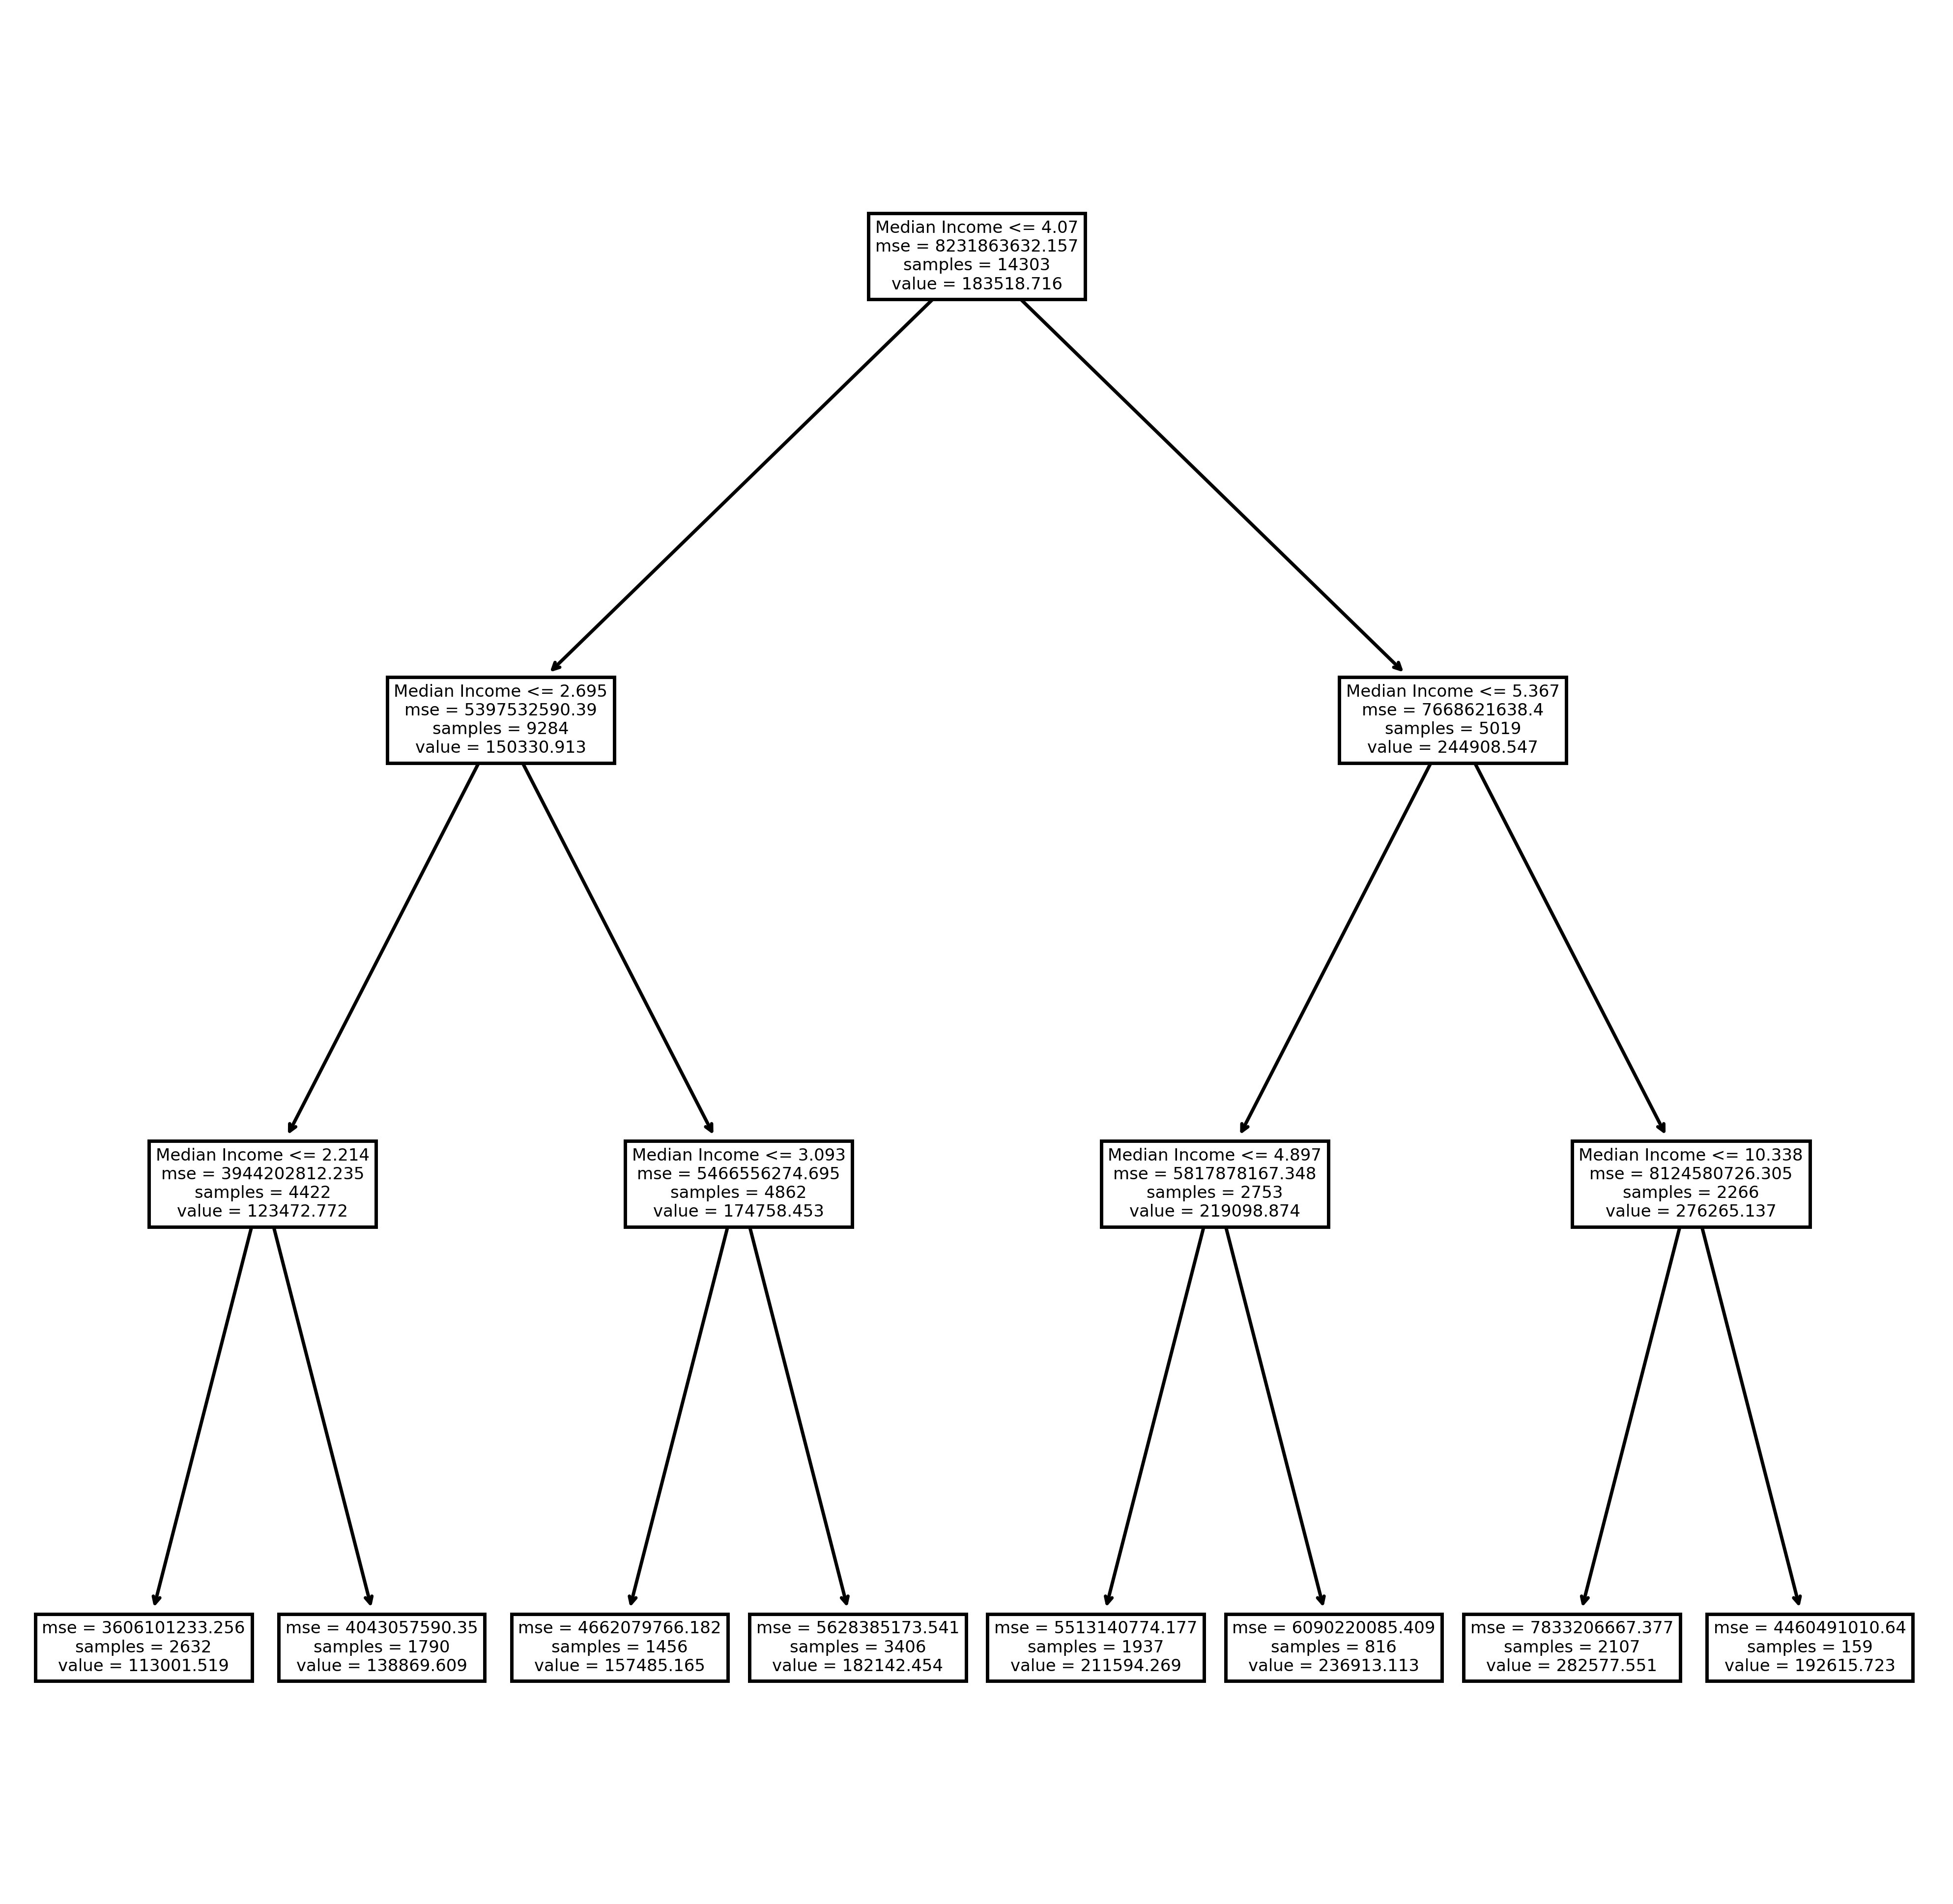

In [67]:
#Decision tree code
Reg_tree_classifier3=tree.DecisionTreeRegressor(max_depth=3)
classifier=Reg_tree_classifier3.fit(x_train3,y_train3)
print('The accuracy of the classifier (The amount, in percentage of the y variable explained by the x variable) with the Testing Data is:\n{}'.format(classifier.score(x_test3,y_test3)))
print('The features explain 29.6% of the Target, which is an okay R-Square value\n')
print('The cross validated accuracy(on each of the 10 bootstrap samples) of the classifier with the Training Data is:\n{}\n'.format(cross_val_score(Reg_tree_classifier3,x_train3,y_train3,cv=10)))
#Plotting the decision tree
fg,ax=plt.subplots(figsize=(10,10),dpi=500)
tree.plot_tree(Reg_tree_classifier3,feature_names=['Median Income','Median House Value'])
plt.show()

Our MSE values still aren't great, but they are smaller. 

Because we didn't learn much regarding the manipulation of mse, I'm not sure how to improve the score much more at this time. The sample size refers to the number of samples in a specific node. The value refers to the prediction value given by a specific node. For example, on the very last node, far right, it means that for a median income less than or equal to 10.338, the median house value would be 192615.723.

STEP 11: Random Forest

We want to build a random forest with 120 to perform the same prediction with the same x and y values from our decision tree.

In [68]:
#Random Forest regression
from sklearn.ensemble import RandomForestRegressor
RandFor_Reg=RandomForestRegressor(n_estimators=120,max_depth=3)
# using 20(default is 100) trees with each having a max depth of 3

RandFor_Reg.fit(x_train,y_train.ravel())
RandFor_Reg.score(x_test,y_test)
#Single prediction with a random forest. Prediction of the 
print('The Median House Value predicted for a Median Income of 3.86'+
      ' respectively is \n{}\n'.format(RandFor_Reg.predict([[3.86]])))


#Visualize each prediction for all 50 trees of the forest. Using the methods estimators_ and predict
[RandFor_Reg.estimators_[n].predict([[84]]) for n in range(120)]

The Median House Value predicted for a Median Income of 3.86 respectively is 
[189649.60200401]



[array([483084.44486692]),
 array([458507.5210084]),
 array([476901.10638298]),
 array([467148.91280654]),
 array([458882.06047516]),
 array([485053.77985075]),
 array([479315.56338028]),
 array([475126.87285223]),
 array([453445.2]),
 array([453741.67864271]),
 array([448853.45674044]),
 array([483456.06338028]),
 array([447646.94924812]),
 array([483533.2742616]),
 array([483273.87455197]),
 array([454294.4330855]),
 array([476088.4084507]),
 array([477191.60805861]),
 array([485870.33905579]),
 array([467298.5026738]),
 array([456128.67976424]),
 array([450016.68441065]),
 array([447620.55234657]),
 array([480976.79391892]),
 array([454786.93177388]),
 array([468853.26162791]),
 array([452423.582]),
 array([468137.85590778]),
 array([451423.63358779]),
 array([457417.83829787]),
 array([481894.57093426]),
 array([482355.894081]),
 array([453200.77799228]),
 array([481436.39846743]),
 array([478024.28308824]),
 array([451305.39310345]),
 array([487342.66545455]),
 array([460061.40663

We want to see how our random forest did in predictions, so below we will single out a median income of 3.86 and find the median house value.

In [69]:
actual=df[df['median_income']==3.86]; actual

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9126,-118.06,34.58,36.0,1493.0,258.0,899.0,260.0,3.86,109300.0,1.0
10500,-117.69,33.47,23.0,3499.0,722.0,1480.0,634.0,3.86,300000.0,0.0


We have two median incomes listed at the value of 3.86. The median house values are different given their difference in the other categories (i.e. how many bedrooms, ocean proximity, population, etc). So, given the circumstances and differences, our random forest actually did pretty well with the predictions!

STEP 12: Support Vector Machine

We start with classification algorithm which attempts to draw a clear separation between any two groups so that we may accurately predict when a sample is from one group or another. As we know, the separation could be linear or nolinear. First, we will get the features and the target. Next, we will split the data into training and testing set.

In [70]:
Target=df.iloc[:,len(df.columns)-1]
Features=df.loc[:,['median_income',"median_house_value"]]
Features_Train, Features_Test, Target_Train, Target_Test=train_test_split(Features, Target, test_size=.3)

In [71]:
Features

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


In [72]:
Target

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
20635    1.0
20636    1.0
20637    1.0
20638    1.0
20639    1.0
Name: ocean_proximity, Length: 20433, dtype: float64

In [73]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [74]:
df["median_income"].mean()

3.8711616013312273

In [75]:
df["median_house_value"].mean()

206864.41315519012

In [76]:
std=StandardScaler()
std.fit(Features)
Features_std=std.transform(Features)
Features_Train, Features_Test, Target_Train, Target_Test=train_test_split(Features_std, Target, test_size=.3)

In [77]:
#LINEAR CLASSIFIER. 
from sklearn import svm
Lin_Clas=svm.SVC(kernel='linear')
Lin_Clas.fit(Features_Train,Target_Train);
print('The accuracy of the Linear SVM classifier is\n{}\n'.format(Lin_Clas.score(Features_Test,Target_Test)))

The accuracy of the Linear SVM classifier is
0.633605220228385



In [78]:
#NON LINEAR CLASSIFIER: AN RBF kernel. Gamma is the coefficient of the Kernel.

RBF_Clas=svm.SVC(kernel='rbf',gamma='auto',C=0.1)
RBF_Clas.fit(Features_Train,Target_Train)
print('The accuracy of the Non Linear SVM classifier with a RBF kernel is\n{}\n'.
      format(RBF_Clas.score(Features_Test,Target_Test)))

The accuracy of the Non Linear SVM classifier with a RBF kernel is
0.6301794453507341



In [79]:
#NON LINEAR CLASSIFIER: A POLYNOMIAL KERNEL. 

POL_Clas=svm.SVC(kernel='poly',degree=3,gamma='scale',C=0.1)
POL_Clas.fit(Features_Train,Target_Train)
print('The accuracy of the Non Linear SVM classifier With a polynomial kernel is\n{}\n'.
      format(POL_Clas.score(Features_Test,Target_Test)))

The accuracy of the Non Linear SVM classifier With a polynomial kernel is
0.5872756933115824



The accuracy of the Linear SVM classifier is 0.6233. The accuracy of the Non Linear SVM classifier with a RBF kernel is 0.62773 and it is pretty much the same compared to the linear SVM classifier. The accuracy of the Non Linear SVM classifier With a polynomial kernel is 0.5920 which is not as close as the other two accurancies of the Non and linear SVM.

Finding out if our prediciton is correct:

In [80]:
print('Prediction: 1=Win and 0=Loss:\n{}\n'.format(Lin_Clas.predict(std.transform([[4,0.40],[200000,0.60]]))))

Prediction: 1=Win and 0=Loss:
[1. 1.]



Our prediction was predicted correctly as I chose values 4 and 200,000 with 40% and 60% respectively.

In [81]:
Features_Test

array([[-0.4455253 , -1.08343874],
       [-0.9252423 , -1.17786594],
       [-0.2753524 ,  0.11379419],
       ...,
       [-0.74222218, -0.25178634],
       [ 0.52601877,  0.2489377 ],
       [-0.43746947, -0.80882019]])

Now, we will create the three most common kernels to see which one satisfies best the division of the data in two classes. Those methods are: Polynomial kernel,captures well polynomial separation, Radial Basis Function(RBF) captures well closed groupings, sigmoid kernels (mimics neural networks).
Our goal is to find an ideal line that separates this dataset in two sections.

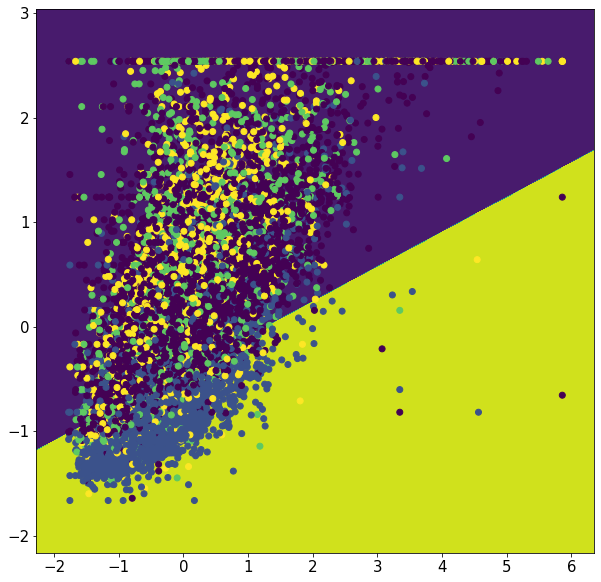

In [82]:
#Plotting the SVM hyperplanes: LINEAR CASE

import matplotlib.pyplot as plt
fig, ax=plt.subplots()
fig.set_size_inches(10, 10)
xx,yy=np.meshgrid(np.arange(Features_std[:,0].min()-0.5,Features_std[:,0].max()+0.5,0.01),
                  np.arange(Features_std[:,1].min()-0.5,Features_std[:,1].max()+0.5,0.01))

z = Lin_Clas.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax.contourf(xx, yy, z)
ax.scatter(Features_Train[:,0], Features_Train[:,1],c=Target_Train)

We can see in the previous plot that there are four variables instead of two. We tried to fix this but we realized that most of our project was with regression rather than cassification. During the semester, we have learned SVM models that all of them were for classification models.
After doing a small research, we have decided to try something new: the SVR model.

We've used the kernel method with support vector machines and the RBF kernel for polynomial features.

In [83]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [84]:
data_labels=df['median_house_value']

In [85]:
svr=SVR(degree=2)
param_grid={
    'C':[1,10,50,100]
}
scoring='r2'
grid=GridSearchCV(svr,param_grid,scoring=scoring,n_jobs=-1,cv=3,verbose=3)
grid.fit(df,data_labels)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVR(degree=2), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100]}, scoring='r2', verbose=3)

In [86]:
print(grid.best_params_)

{'C': 100}


In [87]:
svr=SVR(degree=2,C=100)
scores=cross_val_score(svr,df,data_labels,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.9712441637387679


cheching our results, the linear regression model gave an R2 of 0.91 and the SVR gave an R2 of 0.97.